<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/banner-spectral.png" width="1000" align="middle"/>


# <font color='#ECA702'>**Hands-on Sesi√≥n 4: Clasificacion espectral üì∏ üåà**</font>

# <font color='#4C5FDA'>**Objetivo**</font>



El objetivo de la clasificaci√≥n hiperespectral es clasificar cada p√≠xel/punto de datos en una de $K$ clases.  En general, los m√©todos de clasificaci√≥n son m√°s eficaces que los de desmezcla hiperespectral. Sin embargo, los m√©todos de clasificaci√≥n no son eficaces a la hora de determinar las cantidades de proporci√≥n subp√≠xel o la cantidad de un material que puede encontrarse dentro del campo de visi√≥n correspondiente a un p√≠xel.  

En general, los enfoques de clasificaci√≥n hiperespectral implican:
1. (opcionalmente) extracci√≥n de caracter√≠sticas
2. aplicaci√≥n de un clasificador est√°ndar (es decir, clasificadores de la bibliograf√≠a sobre aprendizaje autom√°tico).

Para esta sesi√≥n haremos uso de 3 clasificadores comunes segun el estado del arte en la clasificacion espectral de im√°genes

# <font color='#4C5FDA'>**Explicaci√≥n m√©tricas empleadas**</font>


- Precisi√≥n (Accuracy): La precisi√≥n es probablemente la m√©trica m√°s directa y sencilla para entender. Imagina que tienes un conjunto de im√°genes y un clasificador que intenta identificar si cada imagen contiene o no un perro. Si el clasificador eval√∫a 100 im√°genes y acierta (correctamente identifica si hay o no un perro) en 90 de ellas, entonces la precisi√≥n del clasificador es del 90%. En t√©rminos matem√°ticos, la precisi√≥n se calcula como el n√∫mero de predicciones correctas (tanto positivas como negativas) dividido por el n√∫mero total de predicciones hechas. Se puede expresar como:

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/accuracy.png" alt="Imagenes espectrales" style="width: 400px;"/>
</div>

- √çndice de Jaccard: El √≠ndice de Jaccard, tambi√©n conocido como la Intersecci√≥n sobre la Uni√≥n (IoU), es una medida un poco m√°s sofisticada que se usa especialmente para evaluar la calidad de los clasificadores en tareas de segmentaci√≥n de im√°genes, donde no solo importa saber si una imagen contiene un objeto espec√≠fico, sino tambi√©n d√≥nde est√° ese objeto dentro de la imagen.  Se calcula como la intersecci√≥n (el √°rea que ambos rect√°ngulos, el predicho y el verdadero, comparten) dividida por la uni√≥n (el √°rea total cubierta por ambos rect√°ngulos, sin contar dos veces las √°reas que se superponen). Esto se expresa matem√°ticamente como:

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/jaccard.webp" alt="Imagenes espectrales" style="width: 400px;"/>
</div>


**Al finalizar este Notebook deberas obtener una grafica comparativa con las predicciones de los tres clasificadores propuestos**

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/objetivo.png" alt="Imagenes espectrales" style="width: 700px;"/>
</div>

# <font color='#4C5FDA'>**Importamos datos necesarios**</font>

In [ ]:
# NO MODIFIQUES ESTA CELDA
!pip install gdown
!gdown --id 19Nq6zbBf3w7O98zM8J4Q_ITCdv8twAGn
!gdown --id 1IXMqFg3wxOaZM2hDPmQx1oOlXld2sf4R
!gdown --id 13kQVCwL5xrd1gdmdO-4fDnx5LTRsiZSu
!gdown --id 1-9DOllknc3R5LBecXHyq0CsxGhsB9nAD
!gdown --id 1-Yg_dHF6vIYFYE5iI5euySI5_fyeKr5i
!gdown --id 1-YgBzsuKCihvPgAy53-2nd1jtDZfwq-8
!gdown --id 1ceW10j7Puj3DvPTdO1IRLRnRe6KwlEqC
!gdown --id 1-EbDvtmyVPEFWXrGbln3YJAnkPR35rlA


# <font color='#4C5FDA'>**Importamos librerias**</font>

In [ ]:
!pip install earthpy

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 21.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.6/20.6 MB 50.8 MB/s eta 0:00:00


In [ ]:
from scipy.io import loadmat
import earthpy.spatial as es
import earthpy.plot as epp
import pandas as pd
import numpy as np
import warnings
import joblib
import seaborn as sns
import torch.nn.functional as F
import torch.utils.data as data_utils
import seaborn as sns
import torch
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score
from torch import nn
from torch import optim



sns.set()
warnings.filterwarnings("ignore")

## <font color='#4C5FDA'>**Informaci√≥n del Dataset**</font>

El conjunto de datos de la Universidad de Pav√≠a es un conjunto de datos de im√°genes hiperespectrales recogidas por un sensor conocido como espectr√≥metro de im√°genes de sistema √≥ptico reflectante (ROSIS-3) sobre la ciudad de Pav√≠a, Italia. La imagen consta de 610√ó340 p√≠xeles con 115 bandas espectrales. La imagen se divide en 9 clases con un total de 42.776 muestras etiquetadas, entre las que se incluyen el asfalto, los prados, la grava, los √°rboles, la chapa met√°lica, el suelo desnudo, el bet√∫n, el ladrillo y la sombra.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/paviau.jpg" alt="Imagenes espectrales" style="width: 600px;"/>
</div>

# <font color='#4C5FDA'><small>**Cargamos el conjunto de datos**</small></font>

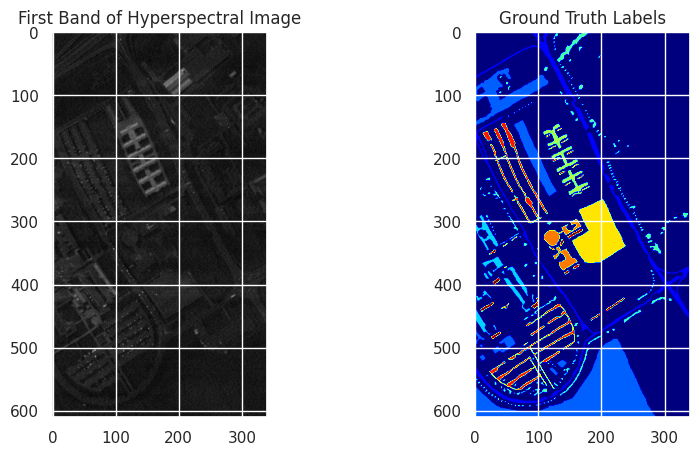

In [ ]:
def load_paviau_dataset(data_path, ground_truth_path):

    data = loadmat(data_path)
    gt = loadmat(ground_truth_path)

    # Assuming the variable names in the .mat files are 'paviaU' and 'paviaU_gt' respectively.
    # Adjust the keys if they are different in your dataset files.
    img = data['paviaU']
    gt = gt['paviaU_gt']

    return img, gt

# Funcion de preprocesamiento
def preprocess_data(img, gt):
    n_rows, n_cols, n_bands = img.shape
    pixels = img.reshape((n_rows*n_cols, n_bands))
    labels = gt.ravel()
    return pixels, labels

# Ejemplo de uso
data_path = 'PaviaU.mat'  
ground_truth_path = 'PaviaU_gt.mat'  
img, gt = load_paviau_dataset(data_path, ground_truth_path)

# Visualizar la primera banda de la imagen y la verdad fundamental para verificar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 0], cmap='gray')
plt.title('First Band of Hyperspectral Image')
plt.subplot(1, 2, 2)
plt.imshow(gt, cmap='jet')
plt.title('Ground Truth Labels')
plt.show()


# <font color='#4C5FDA'><small>**Preparaci√≥n de los datos para el clasificador KNN**</small></font>


Ahora podemos importar nuestro conjunto de datos de im√°genes a√©reas y convertirlo en un formato tabular para facilitar las operaciones de procesamiento sobre √©l. En este caso, cada banda de imagen se convierte en una columna **(¬°tenemos m√°s de 100 bandas!)**, y se crea una columna de clase para almacenar los datos sobre nuestras etiquetas, con cada objeto clasificado posible representado como un n√∫mero (en total 10). Luego se eliminan los elementos asociados con la clase 0, ya que la clase 0 se ha utilizado como una categor√≠a general para todos los objetos no clasificados en la imagen.

In [ ]:
# NO MODIFIQUES ESTA CELDA
n_rows, n_cols, n_bands = img.shape  # Obtiene las dimensiones de la imagen: filas, columnas y bandas espectrales
pixels = img.reshape((n_rows*n_cols, n_bands))  # Reorganiza la imagen en una matriz de p√≠xeles (cada p√≠xel con sus bandas espectrales)
labels = gt.ravel()  # Aplana el array de etiquetas del terreno para que coincida con la estructura de los p√≠xeles
pixels, labels  # Muestra los arrays de p√≠xeles y etiquetas

pixels, labels = preprocess_data(img, gt)  # Preprocesa los datos de la imagen y las etiquetas del terreno
# Filtra los p√≠xeles que no tienen etiqueta en el terreno (etiquetas = 0)
pixels = pixels[labels > 0]  # Selecciona solo los p√≠xeles con etiquetas de terreno
labels = labels[labels > 0]  # Selecciona solo las etiquetas correspondientes a esos p√≠xeles

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.3, random_state=42)  # Usa el 30% de los datos para prueba


# <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">1</font>** üí™</font>
* Construye el clasificador KNN, ayudate de la documentacion oficial en el siguiente enlace: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [ ]:
# Entrenar clasificador KNN
knn = KNeighborsClassifier(None)
knn.fit(None, None)

# Predecir en el conjunto de pruebas
y_pred = knn.predict(None)

In [ ]:
# Evaluacion
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Indice Jaccard: ", jaccard_score(y_test, y_pred, average='macro') )
print("Reporte de clasificacion:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusion:")
cf_matrix_knn = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_knn, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='g')

In [ ]:
# Salida esperada

# <font color='#4C5FDA'><small>**Entrenamiento del clasificador KNN usando todos los datos**</small></font>

In [ ]:
# NO MODIFIQUES ESTA CELDA
# Clasificar toda la imagen para su visualizaci√≥n
full_img_prediction = knn.predict(img.reshape((-1, img.shape[2])))
pred_knn = full_img_prediction.reshape((img.shape[0], img.shape[1]))
gt_flat = gt.ravel()
mask = gt_flat != 0
gt_filtered = gt_flat[mask]
full_img_prediction_filtered = full_img_prediction[mask]

print("Accuracy:", accuracy_score(gt_filtered, full_img_prediction_filtered))
print("Reporte de clasificacion:")
print(classification_report(gt_flat, full_img_prediction))

Accuracy: 0.9264307088086777
Reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    164624
           1       0.17      0.93      0.28      6631
           2       0.24      0.99      0.39     18649
           3       0.24      0.81      0.37      2099
           4       0.13      0.90      0.22      3064
           5       0.44      1.00      0.61      1345
           6       0.11      0.77      0.19      5029
           7       0.43      0.88      0.58      1330
           8       0.22      0.90      0.35      3682
           9       0.09      1.00      0.16       947

    accuracy                           0.19    207400
   macro avg       0.21      0.82      0.32    207400
weighted avg       0.04      0.19      0.07    207400



# <font color='#4C5FDA'><small>**Graficar la prediccion del clasificador KNN**</small></font>

In [ ]:
# Trazar la imagen clasificada

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(pred_knn, cmap='jet')
plt.title('Imagen clasificada con KNN')
plt.subplot(1, 2, 2)
plt.imshow(gt, cmap='jet')
plt.title('Ground Truth')
plt.show()

# <font color='#4C5FDA'><small>**Preprocesamiento para el clasificador Decision Tree**</small></font>

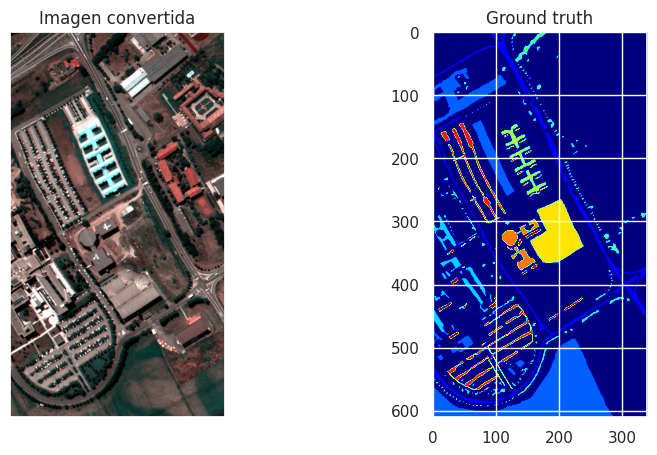

In [ ]:
# NO MODIFIQUES ESTA CELDA

df = pd.DataFrame(img.reshape(img.shape[0]*img.shape[1], -1))
df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]
df['class'] = gt.ravel()
df = df[df['class']!=0]

stacked_bands = np.transpose(img, (2, 0, 1))
sampled_bands = np.array([stacked_bands[0], stacked_bands[50], stacked_bands[100]])
bands = [f'Band {i}' for i in range(1, 102, 50)]
colors = list(mcolors.BASE_COLORS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
epp.plot_rgb(
    stacked_bands,
    rgb=(60, 30, 27),
    stretch=True,
    figsize=(10, 10),
    ax=plt.gca(),
)
plt.title('Imagen convertida')
plt.subplot(1, 2, 2)
plt.imshow(gt, cmap='jet')
plt.title('Ground truth')
plt.show()

# <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">2</font>** üí™</font>
* Construye el clasificador Decision Tree, ayudate de la documentacion oficial en el siguiente enlace: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


In [ ]:
# NO MODIFIQUES ESTA CELDA
x = df.drop(['class'], axis=1) 
y = df['class']

le = preprocessing.LabelEncoder()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, stratify = y)
y_encoder = le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
dt = None
model_dt = dt.fit(None.values, None)
y_pred = model_dt.predict(None.values)

In [ ]:
# Evaluacion
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred), 3)*100, "%")
print("Indice Jaccard: ", jaccard_score(y_test, y_pred, average='macro'))
print("Reporte de clasificacion:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cf_matrix_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_dt, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='g')

Accuracy Score:  88.5 %
Indice Jaccard:  0.7767875136209388
Reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1989
           1       0.93      0.93      0.93      5595
           2       0.73      0.68      0.71       630
           3       0.90      0.91      0.91       919
           4       0.99      0.99      0.99       403
           5       0.79      0.80      0.80      1509
           6       0.76      0.77      0.77       399
           7       0.79      0.82      0.80      1105
           8       1.00      1.00      1.00       284

    accuracy                           0.88     12833
   macro avg       0.87      0.87      0.87     12833
weighted avg       0.88      0.88      0.88     12833

Confusion Matrix:


<Axes: >

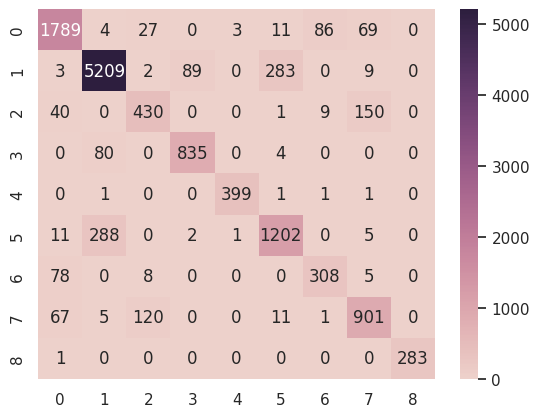

In [ ]:
# Salida esperada

# <font color='#4C5FDA'><small>**Entrenamiento del clasificador Decision Tree**</small></font>

In [ ]:
l = []
for i in range(img.shape[0]*img.shape[1]):
    if i in list(df.index):
        l.append(le.inverse_transform(model_dt.predict([df.loc[i, :][:-1]])))
    else:
        l.append(0)

pred_dt = np.array(l, dtype=object).reshape(gt.shape).astype('float')

# <font color='#4C5FDA'><small>**Graficar la prediccion del clasificador Decision Tree**</small></font>

In [ ]:
# Trazar la imagen clasificada

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(pred_dt, cmap='jet')
plt.title('Imagen clasificada con Decision Tree')
plt.subplot(1, 2, 2)
plt.imshow(gt, cmap='jet')
plt.title('Ground Truth')
plt.show()

# <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">3</font>** üí™</font>
* Eval√∫a el modelo de redes neuronales que implementamos para que visualices los resultados de esta clasificaci√≥n.


# <font color='#4C5FDA'><small>**Declaracion del modelo**</small></font>

In [ ]:
# NO MODIFIQUES ESTA CELDA

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.cv1 = nn.Conv3d(1, 8, kernel_size=(3,3, 5))
        self.cv2 = nn.Conv2d(8, 16, kernel_size=(3,3))
        self.fc1 = nn.Linear(100048, 128)
        self.dp = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.cv1(x)
        out = F.relu(out)
        out = torch.reshape(out, (out.shape[0], out.shape[1], out.shape[2], out.shape[3]*out.shape[4]))
        out = self.cv2(out)
        out = F.relu(out)
        out = torch.flatten(out, 1)
        out = self.fc1(out)
        out = self.dp(out)
        out = F.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
def zeros_pad(x, margin):
    padded_x = torch.zeros((x.shape[0] + 2 * margin, x.shape[1] + 2 * margin, x.shape[2]))
    padded_x[margin:x.shape[0] + margin, margin:x.shape[1] + margin, :] = x
    return padded_x

def create_image(x, y, window_size):
    margin = (window_size - 1) // 2
    padded_x = zeros_pad(x, margin=margin)
    patched_x = torch.zeros((x.shape[0] * x.shape[1], window_size, window_size, x.shape[2]))
    patched_y = torch.zeros((x.shape[0] * x.shape[1]))
    patch_index = 0
    for i in range(margin, padded_x.shape[0] - margin):
        for j in range(margin, padded_x.shape[1] - margin):
            patch = padded_x[i - margin:i + margin + 1, j - margin:j + margin + 1]
            patched_x[patch_index, :, :, :] = patch
            patched_y[patch_index] = y[i-margin, j-margin]
            patch_index += 1
    patched_x = patched_x[patched_y>0,:,:,:]
    patched_y = patched_y[patched_y>0]
    patched_y -= 1
    return patched_x, patched_y

# <font color='#4C5FDA'><small>**Cargamos los modelos necesarios**</small></font>

In [ ]:

# Cargar el modelo de Deep Learning completo
model = torch.load('complete_model.pth')
model.eval()

CNNModel(
  (cv1): Conv3d(1, 8, kernel_size=(3, 3, 5), stride=(1, 1, 1))
  (cv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=100048, out_features=128, bias=True)
  (dp): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
)

In [ ]:
# Cargar el modelo PCA
pca = joblib.load('model_pca.pkl')

# Cargar los conjuntos de datos particionados
cnn_x_train = torch.load('cnn_x_train.pth')
cnn_x_test = torch.load('cnn_x_test.pth')
cnn_y_train = torch.load('cnn_y_train.pth')
cnn_y_test = torch.load('cnn_y_test.pth')

In [ ]:
dimensions = 17
window_size = 25
test_perc = 0.3

# Aqu√≠ realizamos la creaci√≥n de DataLoader para la evaluaci√≥n
# No necesitas aplicar PCA de nuevo, ya que los datos ya est√°n transformados y listos para usarse
test = torch.utils.data.TensorDataset(cnn_x_test, cnn_y_test)
testloader = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

# <font color='#4C5FDA'><small>**Ejecuta las siguientes 2 celdas para evaluar el modelo pre-entrenado**</small></font>

In [ ]:
# NO MODIFIQUES ESTA CELDA
def confusion_matrix(data, nb_classes):
    df_cm = pd.DataFrame(data,
                          range(nb_classes), range(nb_classes))
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap='Blues',
                fmt='g')
    plt.title("Confusion Matrix", fontsize = 20)
    plt.xlabel("Predicted Output", fontsize = 18)
    plt.ylabel("Expected Output", fontsize = 18)
    plt.show()

def acc_per_class(model, testloader, nb_classes):
    model.eval()
    confusion_mat = torch.zeros(nb_classes, nb_classes)
    class_correct = torch.zeros(10)
    class_total = torch.zeros(10)
    total = 0
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_mat[t.long(), p.long()] += 1

    confusion_matrix(confusion_mat.data.cpu().numpy(), nb_classes)

    per_class_acc = 100*confusion_mat.diag()/confusion_mat.sum(1)
    for i, j in enumerate(per_class_acc.data.cpu().numpy()):
        print("Class:", i, "Accuracy:", j)
    acc = torch.mean(per_class_acc).data.cpu().numpy()
    print("Overall Accuracy: ", acc, "%")

In [ ]:
# NO MODIFIQUES ESTA CELDA
x = np.reshape(img, (-1, img.shape[2]))
x_pca = pca.fit_transform(x)
x_pca = np.reshape(x_pca, (img.shape[0], img.shape[1], dimensions))
padded_x = zeros_pad(torch.tensor(x_pca), window_size//2)

pred = np.zeros((gt.shape[0], gt.shape[1]))
for h in range(gt.shape[0]):
    for w in range(gt.shape[1]):
        if int(gt[h, w]) == 0:
            continue
        else:
            model.eval()
            image_patch = padded_x[h:h+window_size, w:w+window_size, :]
            image = torch.permute(image_patch[None, None, :, :, :], (0, 1, 4, 2, 3))
            pred[h][w] = model(image).argmax(dim=1) + 1

acc_per_class(model, testloader, 9)


# <font color='#4C5FDA'><small>**Ejecuta la siguiente celda para obtener el √çndice de Jaccard**</small></font>

In [ ]:
# NO MODIFIQUES ESTA CELDA
def jaccard_coefficient(pred, gt, nb_classes):
    jaccard_per_class = np.zeros(nb_classes)
    for cls in range(1, nb_classes + 1):  # Class labels start from 1
        pred_cls = pred == cls
        gt_cls = gt == cls
        intersection = np.logical_and(pred_cls, gt_cls).sum()
        union = np.logical_or(pred_cls, gt_cls).sum()
        if union == 0:
            jaccard_per_class[cls - 1] = np.nan  # To handle division by zero
        else:
            jaccard_per_class[cls - 1] = intersection / union
    return np.nanmean(jaccard_per_class), jaccard_per_class  # Return average and per-class Jaccard

In [ ]:
nb_classes = 9  # N√∫mero de clases
avg_jaccard, jaccard_per_class = jaccard_coefficient(pred, gt, nb_classes)
print("Average Jaccard Coefficient:", avg_jaccard)
print("Jaccard Coefficient per Class:", jaccard_per_class)

Average Jaccard Coefficient: 0.7564105313039867
Jaccard Coefficient per Class: [0.7694258  0.99305556 0.70819517 0.93919793 0.92060233 0.97898493
 0.75611143 0.59385666 0.14826498]


# <font color='#4C5FDA'><small>**Graficar la prediccion del clasificador con Deep Learning**</small></font>

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(pred, cmap='jet')
plt.title('Imagen clasificada con Deep Learning')
plt.subplot(1, 2, 2)
plt.imshow(gt, cmap='jet')
plt.title('Ground Truth')
plt.show()

# **<font color="#FF0000">E</font><font color="#FF7F00">x</font><font color="#FFFF00">t</font><font color="#00FF00">r</font><font color="#0000FF">a</font>**: Grafica los tres resultados de los tres clasificadores y compara los resultados de manera visual. ¬øCual crees que es el mejor clasificador y por qu√©?

In [ ]:
None